In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier



In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
y_test.shape

(10000,)

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

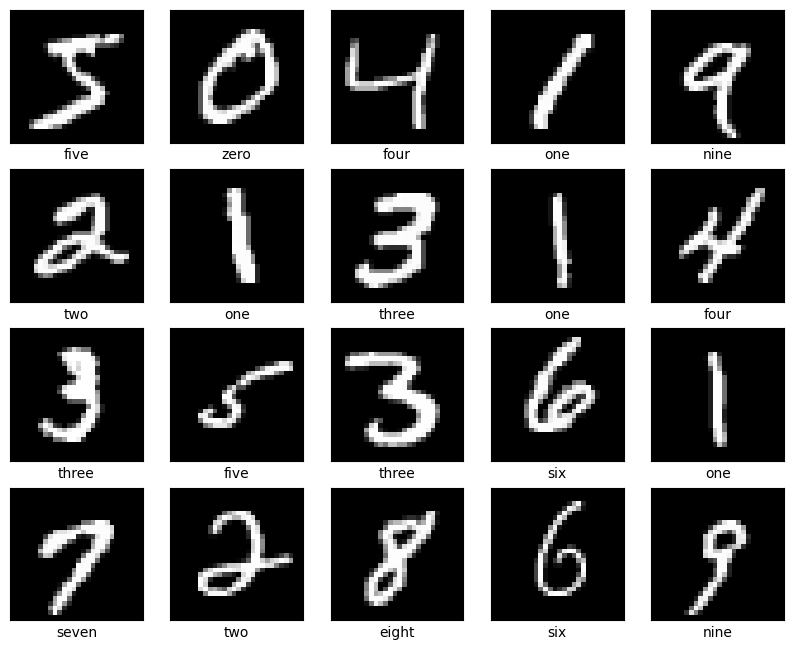

In [7]:
col_name=['zero','one','two','three','four','five','six','seven','eight','nine']
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(col_name[y_train[i]])
plt.show()


In [8]:
y_train.shape

(60000,)

In [9]:
x_train_2d=x_train.reshape(60000,784)
x_test_2d=x_test.reshape(10000,784)

y_train_cc=to_categorical(y_train,num_classes=10)
y_test_cc=to_categorical(y_test,num_classes=10)

In [25]:
model=Sequential([layers.Dense(256,activation='relu',input_shape=(784,)),
                  layers.Dropout(0.3),layers.BatchNormalization(),
                layers.Dense(64,activation='relu',),
                layers.Dense(64,activation='relu',),
                layers.Dense(10,activation='sigmoid',)])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [27]:
history=model.fit(x_train_2d,y_train_cc,batch_size=100,epochs=10,validation_data=(x_test_2d,y_test_cc))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9086 - loss: 0.3050 - val_accuracy: 0.9604 - val_loss: 0.1285
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9557 - loss: 0.1404 - val_accuracy: 0.9699 - val_loss: 0.0980
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9648 - loss: 0.1123 - val_accuracy: 0.9722 - val_loss: 0.0883
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.0968 - val_accuracy: 0.9747 - val_loss: 0.0802
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9725 - loss: 0.0865 - val_accuracy: 0.9745 - val_loss: 0.0785
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.0759 - val_accuracy: 0.9747 - val_loss: 0.0853
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0692 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0677 - val_accuracy: 0.

In [28]:
y_predict=model.predict(x_test_2d)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
y_predict

array([[1.5020072e-03, 1.0323340e-01, 9.9203515e-01, ..., 9.9999952e-01,
        5.0572287e-02, 8.1630677e-01],
       [1.3029968e-03, 9.5884800e-01, 9.9999601e-01, ..., 8.3654365e-03,
        8.6923935e-02, 1.3814087e-03],
       [1.7561737e-02, 9.9989551e-01, 8.5514002e-02, ..., 6.1275566e-01,
        5.0406730e-01, 1.0430548e-01],
       ...,
       [5.4666214e-04, 3.7174803e-01, 6.9713131e-02, ..., 9.0066779e-01,
        3.4781769e-02, 7.4499953e-01],
       [4.8494045e-02, 1.4484939e-01, 6.7840107e-03, ..., 2.7288553e-01,
        9.8853999e-01, 4.6964288e-02],
       [7.8193121e-02, 9.8924465e-05, 7.6161705e-02, ..., 4.4332892e-03,
        4.1631505e-02, 2.6023978e-01]], dtype=float32)

In [31]:
y_test.shape

(10000,)

In [33]:
y_predicts=np.argmax(y_predict,axis=1)
y_test_eval=np.argmax(y_test_cc,axis=1)

Text(0.5, 1.0, 'True or False predicted digit MNIST\n')

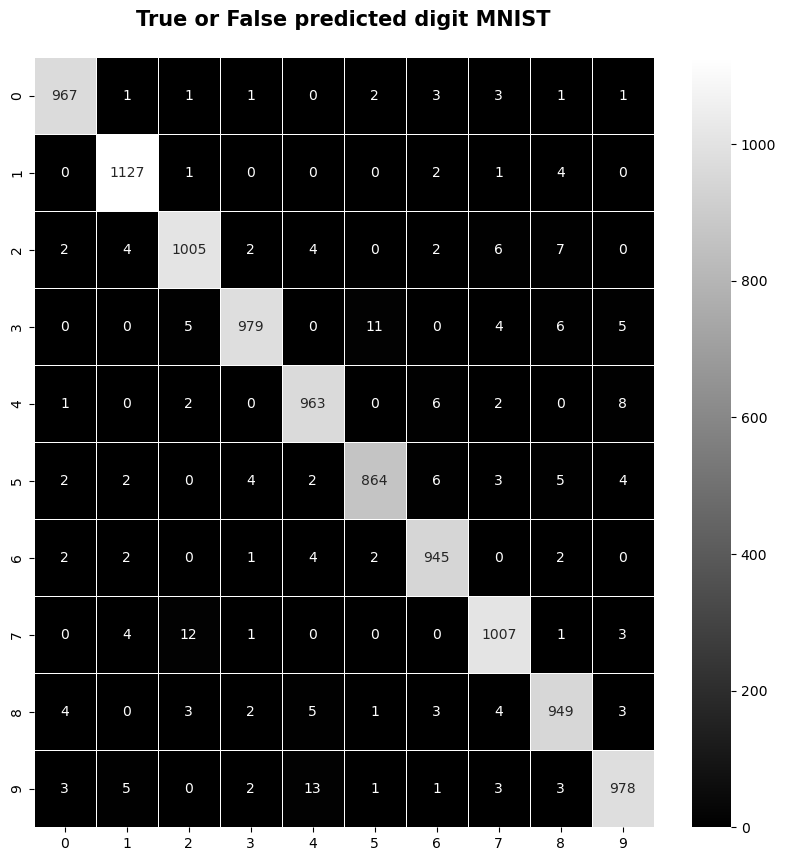

In [50]:
cm=confusion_matrix(y_test_eval,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':10 },linewidths=0.5,cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)

In [35]:
cm

array([[ 967,    1,    1,    1,    0,    2,    3,    3,    1,    1],
       [   0, 1127,    1,    0,    0,    0,    2,    1,    4,    0],
       [   2,    4, 1005,    2,    4,    0,    2,    6,    7,    0],
       [   0,    0,    5,  979,    0,   11,    0,    4,    6,    5],
       [   1,    0,    2,    0,  963,    0,    6,    2,    0,    8],
       [   2,    2,    0,    4,    2,  864,    6,    3,    5,    4],
       [   2,    2,    0,    1,    4,    2,  945,    0,    2,    0],
       [   0,    4,   12,    1,    0,    0,    0, 1007,    1,    3],
       [   4,    0,    3,    2,    5,    1,    3,    4,  949,    3],
       [   3,    5,    0,    2,   13,    1,    1,    3,    3,  978]],
      dtype=int64)

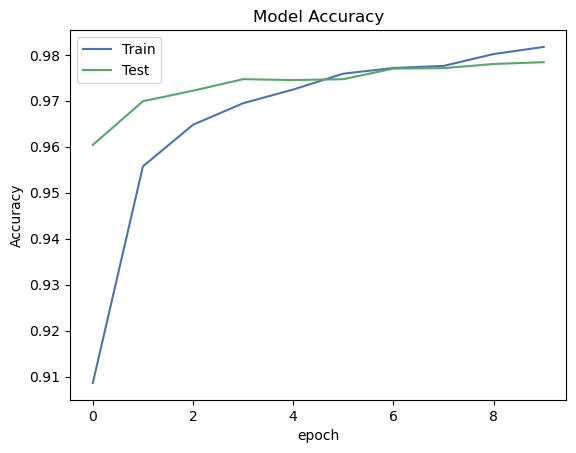

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.show()

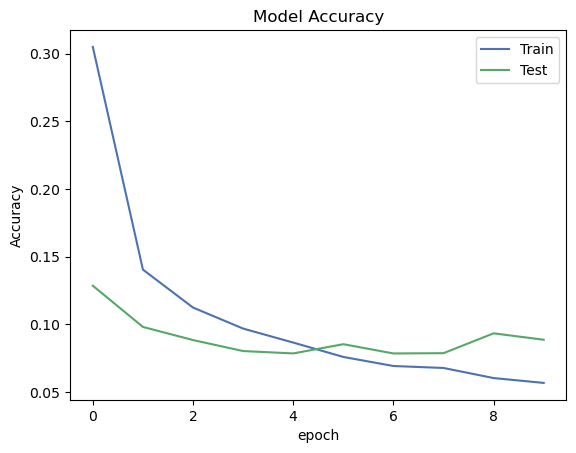

In [62]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.show()

In [63]:
y_pred=model.predict(x_train_2d[[2]])
y_predi=np.argmax(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [68]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
a=np.argmax(y_test_cc[2])
a

1

Text(0.5, 0, 'Actual:one,Predicted:four')

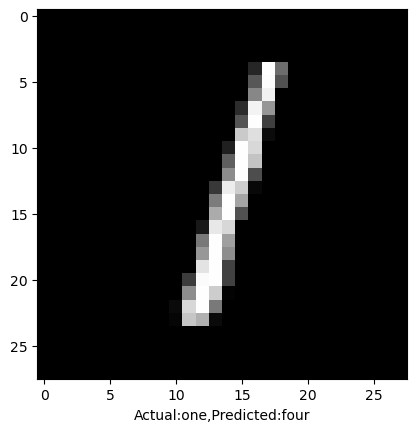

In [85]:
plt.imshow(x_test_2d[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{},Predicted:{}".format(col_name[np.argmax(y_test_cc[2])],col_name[y_predi]))

In [86]:
y_predi

4